Analiza zbioru danych z kaggle link: https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset

Zbiór ten zawiera informacje o wynikach studenta oraz czynnikach, które mogą mieć na to wpływ. Są to:
1. Student_ID: ID_Studenta – Unikalny identyfikator każdego studenta
2. First_Name: Imię – Imię studenta
3. Last_Name: Nazwisko – Nazwisko studenta
4. Email: Email – Adres e-mail kontaktowy (może być zanonimizowany)
5. Gender: Płeć – Płeć studenta: Mężczyzna (Male), Kobieta (Female), Inna (Other)
6. Age: Wiek – Wiek studenta
7. Department: Wydział/Kierunek – Kierunek studiów studenta (np. Informatyka (CS), Inżynieria, Biznes)
8. Attendance (%): Frekwencja (%) – Procentowa frekwencja na zajęciach (0–100%)
9. Midterm_Score: Wynik_z_kolokwium – Wynik z egzaminu śródsemestralnego (0–100)
10. Final_Score: Wynik_z_egzaminu_końcowego – Wynik z egzaminu końcowego (0–100)
11. Assignments_Avg: Średnia_z_zadań_domowych – Średnia ocena ze wszystkich zadań domowych (0–100)
12. Quizzes_Avg: Średnia_z_kartkówek – Średnia ocena z krótkich sprawdzianów/kartkówek (0–100)
13. Participation_Score: Ocena_z_aktywności – Ocena za aktywność i udział w zajęciach (0–10)
14. Projects_Score: Ocena_z_projektów – Ocena z projektów/prac zaliczeniowych (0–100)
15. Total_Score: Łączny_wynik – Ważona suma wszystkich ocen (całkowity wynik punktowy)
16. Grade: Ocena_końcowa – Ocena literowa (A, B, C, D, F)
17. Study_Hours_per_Week: Godziny_nauki_na_tydzień – Średnia liczba godzin nauki w tygodniu
18. Extracurricular_Activities: Zajęcia_dodatkowe – Udział w zajęciach pozalekcyjnych (Tak/Nie)
19. Internet_Access_at_Home: Internet_w_domu – Dostęp do internetu w domu (Tak/Nie)
20. Parent_Education_Level: Wykształcenie_rodziców – Najwyższy poziom wykształcenia rodziców (Brak, Szkoła średnia, Licencjat, Magister, Doktorat/PhD)
21. Family_Income_Level: Poziom_dochodów_rodziny – Poziom dochodów rodziny (Niski, Średni, Wysoki)
22. Stress_Level (1-10): Poziom_stresu – Samoocena poziomu stresu (1: niski – 10: wysoki)
23. Sleep_Hours_per_Night: Godziny_snu_na_noc – Średnia liczba godzin snu na dobę

# Wstępna obróbka zbioru

Najpierw usuniemy niepotrzebne kolumny, czyli:
Student_ID(ID_Studenta) - data frame i tak już zawiera swoje indeksowanie
First_Name,First_Name,Email - dane te nie są potrzebne z analizie, gdyż są to informacje o studencie

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahmoudelhemaly/students-grading-dataset")
print(path)

C:\Users\mz10m\.cache\kagglehub\datasets\mahmoudelhemaly\students-grading-dataset\versions\5


In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv(path+"\Students Performance Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [6]:
df = df.drop(['First_Name','Last_Name','Email','Student_ID'], axis =1)

Usunięcie nulli:

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3975 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      3975 non-null   object 
 1   Age                         3975 non-null   int64  
 2   Department                  3975 non-null   object 
 3   Attendance (%)              3975 non-null   float64
 4   Midterm_Score               3975 non-null   float64
 5   Final_Score                 3975 non-null   float64
 6   Assignments_Avg             3975 non-null   float64
 7   Quizzes_Avg                 3975 non-null   float64
 8   Participation_Score         3975 non-null   float64
 9   Projects_Score              3975 non-null   float64
 10  Total_Score                 3975 non-null   float64
 11  Grade                       3975 non-null   object 
 12  Study_Hours_per_Week        3975 non-null   float64
 13  Extracurricular_Activities  3975 non-n

Jak widać udało nam się 1025 pozycje z nullami

# Zmiana danych tekstowych na liczbowe

In [9]:
print(df["Parent_Education_Level"].unique())
Parent_Education = {"Master's":0, "High School":1, "Bachelor's":2, "PhD":3}
df=df.replace(Parent_Education)

["Master's" 'High School' "Bachelor's" 'PhD']


C:\Users\mz10m\AppData\Local\Temp\ipykernel_6988\2711552382.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(Parent_Education)


In [10]:
print(df["Family_Income_Level"].unique())
Family_income = {"Low":0, "Medium":1, "High":2}
df=df.replace(Family_income)

['Medium' 'Low' 'High']


C:\Users\mz10m\AppData\Local\Temp\ipykernel_6988\1560246698.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(Family_income)


In [11]:
print(df["Internet_Access_at_Home"].unique())
Internet_access = {"No":0, "Yes":1}
df=df.replace(Internet_access)

['No' 'Yes']


C:\Users\mz10m\AppData\Local\Temp\ipykernel_6988\1921890149.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(Internet_access)


# Wstępny opis zbioru

In [12]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
count,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000
mean,21.052327,75.281909,70.707572,69.573192,75.002684,74.760018,50.500327,74.729970,71.669846,17.569308,0.505660,0.499623,1.514214,0.987421,5.504906,6.511245
std,1.993770,14.458947,17.369083,17.140551,14.343446,14.390146,29.187698,14.456935,7.241839,7.205194,0.500031,0.500063,1.123585,0.813105,2.888624,1.442410
min,18.000000,50.020000,40.000000,40.010000,50.000000,50.000000,0.000000,50.000000,50.602000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,19.000000,62.660000,56.255000,54.905000,62.630000,62.395000,25.300000,62.025000,66.508750,11.500000,0.000000,0.000000,0.000000,0.000000,3.000000,5.300000
50%,21.000000,75.570000,70.830000,69.380000,75.100000,74.790000,50.300000,74.420000,71.632500,17.500000,1.000000,0.000000,2.000000,1.000000,6.000000,6.500000
75%,23.000000,87.930000,85.610000,83.950000,87.415000,87.110000,76.200000,87.510000,76.728750,23.800000,1.000000,1.000000,3.000000,2.000000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,100.000000,100.000000,95.091500,30.000000,1.000000,1.000000,3.000000,2.000000,10.000000,9.000000


# Wykresy kołowe

Procentowy wykres kołowy wg. płci

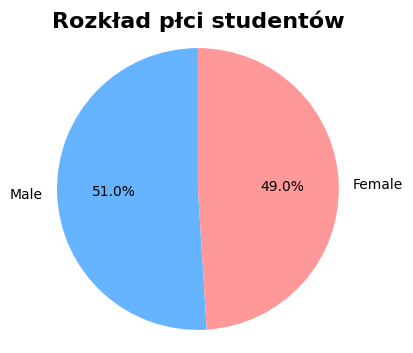

In [13]:
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()
#print(gender_counts)
plt.figure(figsize=(4,4))
plt.pie(gender_counts, 
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999', '#99ff99'],
)

plt.title('Rozkład płci studentów', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

Jak widać, wartości są zbliżone do siebie, z małą przewagą mężczyzn w stosunku do kobiet
Ciekawostką jest, że dane te zbliżone są do danych procentowych płci noworodków: 51,2% płci męskiej i 48.8% płci żeńskiej 

Rozkład wieku w grupie oraz względem płci

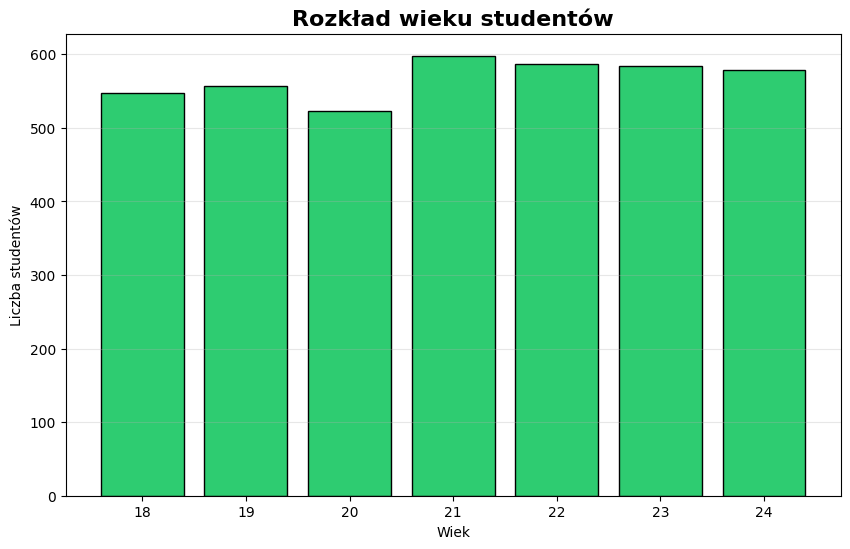

In [14]:
plt.figure(figsize=(10, 6))
age_counts = df['Age'].value_counts().sort_index()
plt.bar(
    age_counts.index,
    age_counts.values,
    color='#2ecc71',
    edgecolor='black'
)
plt.title('Rozkład wieku studentów', fontsize=16, fontweight='bold')
plt.xlabel('Wiek')
plt.ylabel('Liczba studentów')
plt.xticks(age_counts.index)
plt.grid(axis='y', alpha=0.3)
plt.show()

Jak widać wiek studentów jest rozłożony w miarę równomiernie. Najwięcej jest osób w wieku 21 lat - ok 600, a najmniej w wieku 20-około525
Po przekroczeniu 21 lat, ilość osób w tym wieku zaczyna pomalutku spadać

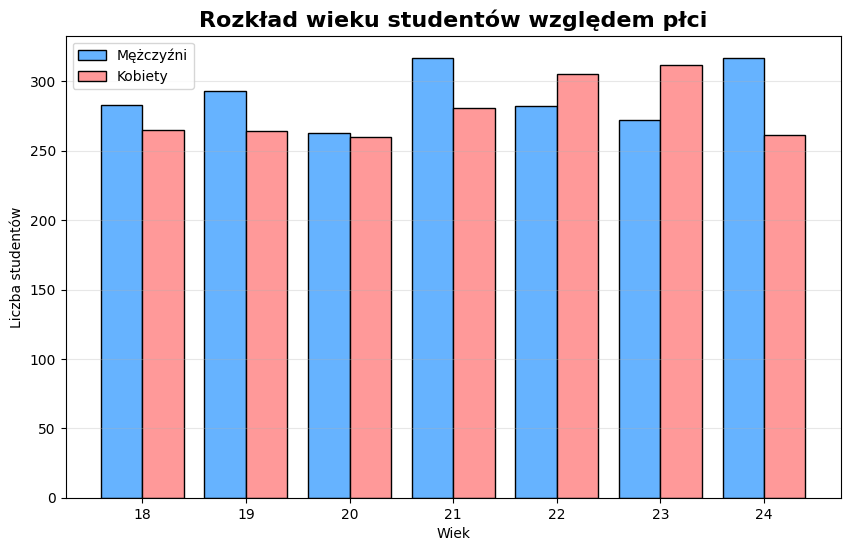

In [15]:
plt.figure(figsize=(10, 6))
age_counts_male = df[df['Gender'] == 'Male']['Age'].value_counts().sort_index()
age_counts_female  = df[df['Gender'] == 'Female']['Age'].value_counts().sort_index()
width = 0.4
plt.bar(
    age_counts.index - width/2,
    age_counts_male.values,
    width = width,
    color='#66b3ff',
    edgecolor='black',
    label = "Mężczyźni",
)

plt.bar(
    age_counts.index + width/2,
    age_counts_female.values,
    width = width,
    color='#ff9999',
    edgecolor='black',
    label = "Kobiety",
)

plt.title('Rozkład wieku studentów względem płci', fontsize=16, fontweight='bold')
plt.xlabel('Wiek')
plt.ylabel('Liczba studentów')
plt.xticks(age_counts.index)
plt.legend(loc='best')
plt.grid(axis='y', alpha=0.3)
plt.show()

Jak widać węźczyźni dominują w ilościach pod względem wieku. Wyjątkie są osoby w wieku 22 i 23, gdzie jest więcej kobiet
Największa przepaść jest wśród osób w wieku 24 lat.

Teraz dokonamy procentowego sprawdzenia ilości przespanych godzin przez wszystkie osoby, 
ale najpierw dokonamy zaogrąglenia godzin snu do pełnych godzin(zgodnie z zasadami matematycznymi

In [16]:
df_sleep = df.copy()
df_sleep['Sleep_Hours_per_Night'] = df['Sleep_Hours_per_Night'].round()

In [17]:
df_sleep['Sleep_Hours_per_Night'].unique()

array([6., 4., 5., 8., 7., 9.])

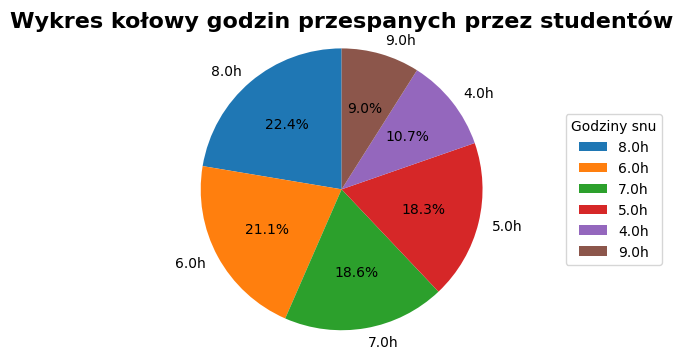

In [18]:
hours_slept_count = df_sleep['Sleep_Hours_per_Night'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(hours_slept_count,
        labels=[f"{x}h" for x in hours_slept_count.index],
        autopct='%1.1f%%',
        startangle=90,
)

plt.title('Wykres kołowy godzin przespanych przez studentów', fontsize=16, fontweight='bold')

plt.legend(title="Godziny snu", loc="center left", bbox_to_anchor=(1.2, 0.5))

plt.axis('equal')
plt.show()

In [19]:
print(100 - 9 - 22.4)
print(10.7+18.3)

68.6
29.0


Jak widać, aż 68.6% procent osób śpi mniej niz wymagane 8 godzin.
A 29% śpi 5 lub 4 godziny!!!!!

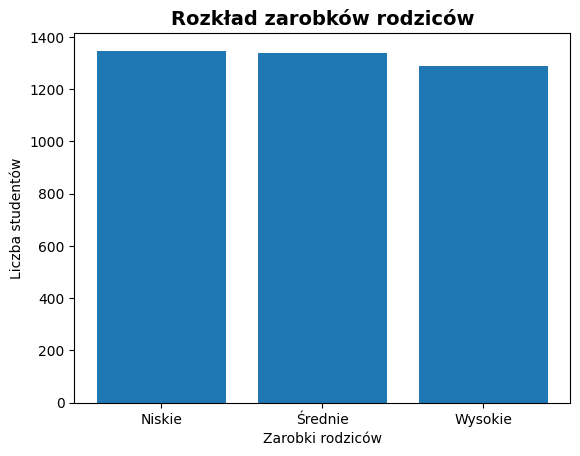

In [20]:
plt.bar(range(len(df['Family_Income_Level'].unique())),df['Family_Income_Level'].value_counts())
plt.title('Rozkład zarobków rodziców', fontsize=14, fontweight='bold')
plt.xticks(range(3),["Niskie", "Średnie", "Wysokie"])
plt.xlabel('Zarobki rodziców')
plt.ylabel('Liczba studentów')
plt.show()

W przypadku zarobków rodziców nie jest drobny spadek w przypadku wysokich wynagrodzeń lecz reszta jest podobnie rozłożona

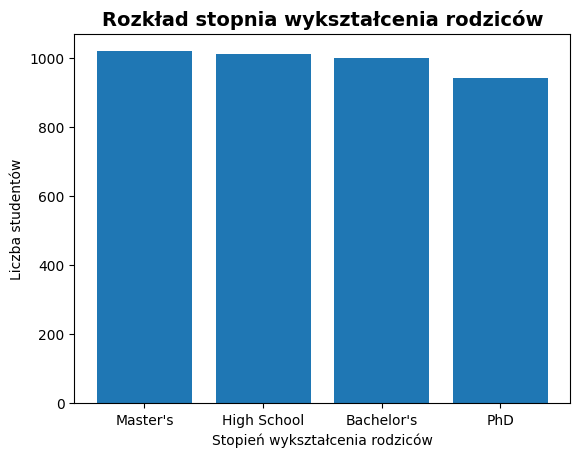

In [21]:
plt.bar(range(len(df['Parent_Education_Level'].unique())),df['Parent_Education_Level'].value_counts())
plt.title('Rozkład stopnia wykształcenia rodziców', fontsize=14, fontweight='bold')
plt.xticks(range(4),["Master's", "High School", "Bachelor's", "PhD"])
plt.xlabel('Stopień wykształcenia rodziców')
plt.ylabel('Liczba studentów')
plt.show()

Jak widać stopień wykształcenia jest mniej więcej równo rozłożony z wyjątkiem doktorów gdzie widać wyraźny spadek

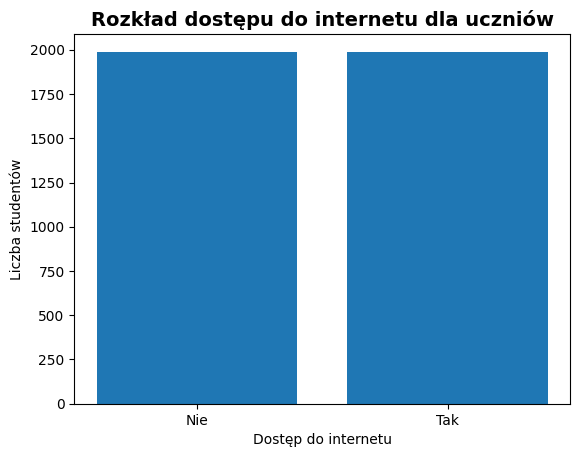

In [22]:
plt.bar(range(len(df['Internet_Access_at_Home'].unique())),df['Internet_Access_at_Home'].value_counts())
plt.title('Rozkład dostępu do internetu dla uczniów', fontsize=14, fontweight='bold')
plt.xticks(range(2),["Nie", "Tak"])
plt.xlabel('Dostęp do internetu')
plt.ylabel('Liczba studentów')
plt.show()

W przypadku dostępu do internetu statystyki są niemalże idealnie podzielone na pół

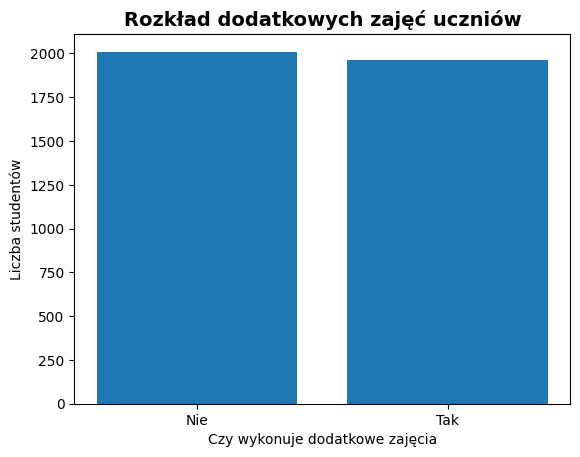

In [25]:
plt.bar(range(len(df['Extracurricular_Activities'].unique())),df['Extracurricular_Activities'].value_counts())
plt.title('Rozkład dodatkowych zajęć uczniów', fontsize=14, fontweight='bold')
plt.xticks(range(2),["Nie", "Tak"])
plt.xlabel('Czy wykonuje dodatkowe zajęcia')
plt.ylabel('Liczba studentów')
plt.show()

W dodatkowych aktywnościach wykonywanych przez uczniów jest lekka przewaga dla osób nie wykonywujących aktywności

# Wykres wyników nauki

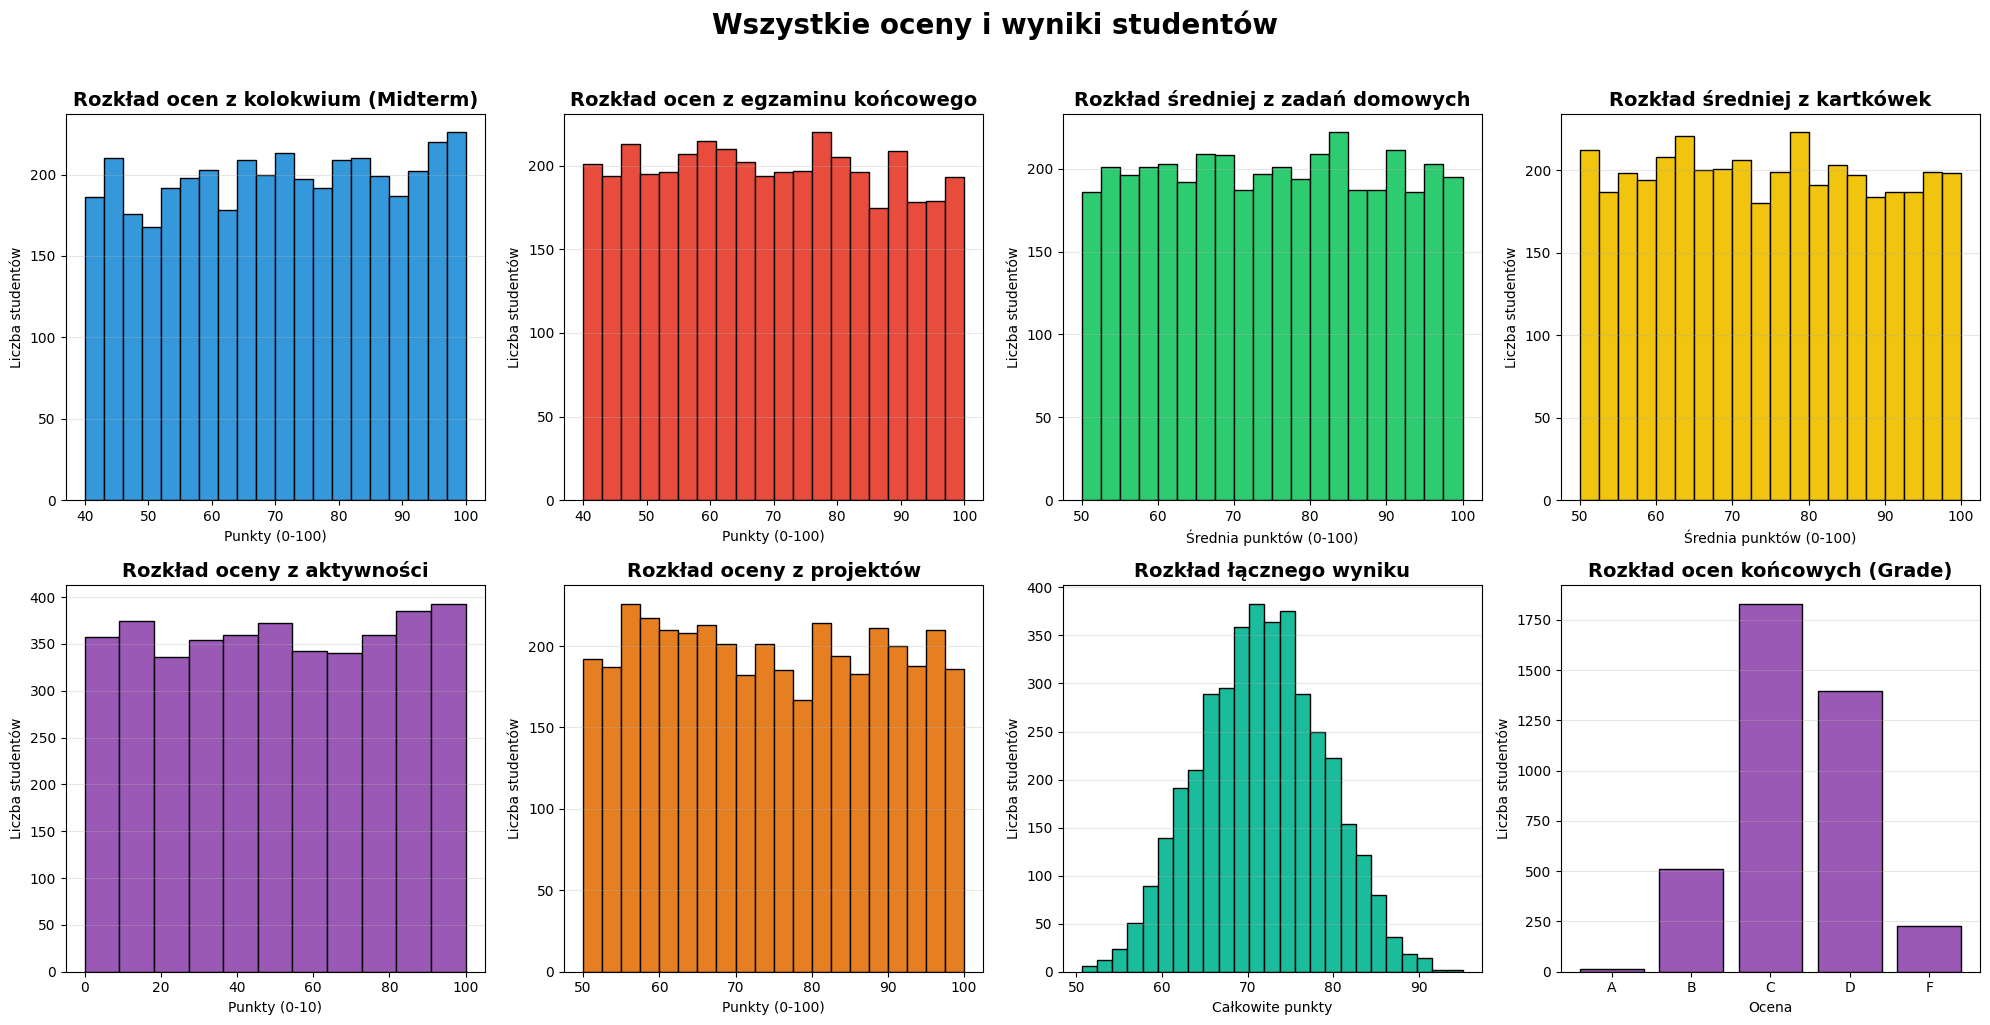

In [81]:
plt.figure(figsize=(20, 10))

#Midterm_Score
plt.subplot(2, 4, 1)
plt.hist(df['Midterm_Score'],
         bins=20,
         color='#3498db',
         edgecolor='black')
plt.title('Rozkład ocen z kolokwium (Midterm)', fontsize=14, fontweight='bold')
plt.xlabel('Punkty (0-100)')
plt.ylabel('Liczba studentów')
plt.grid(axis='y', alpha=0.3)

#Final_Score
plt.subplot(2, 4, 2)
plt.hist(df['Final_Score'],
         bins=20,
         color='#e74c3c',
         edgecolor='black')
plt.title('Rozkład ocen z egzaminu końcowego', fontsize=14, fontweight='bold')
plt.xlabel('Punkty (0-100)')
plt.ylabel('Liczba studentów')
plt.grid(axis='y', alpha=0.3)

#Assignments_Avg
plt.subplot(2, 4, 3)
plt.hist(df['Assignments_Avg'],
         bins=20,
         color='#2ecc71',
         edgecolor='black')
plt.title('Rozkład średniej z zadań domowych', fontsize=14, fontweight='bold')
plt.xlabel('Średnia punktów (0-100)')
plt.ylabel('Liczba studentów')
plt.grid(axis='y', alpha=0.3)

#Quizzes_Avg
plt.subplot(2, 4, 4)
plt.hist(df['Quizzes_Avg'],
         bins=20,
         color='#f1c40f',
         edgecolor='black')
plt.title('Rozkład średniej z kartkówek', fontsize=14, fontweight='bold')
plt.xlabel('Średnia punktów (0-100)')
plt.ylabel('Liczba studentów')
plt.grid(axis='y', alpha=0.3)

#Participation_Score
plt.subplot(2, 4, 5)
plt.hist(df['Participation_Score'],
         bins=11,
         color='#9b59b6',
         edgecolor='black')
plt.title('Rozkład oceny z aktywności', fontsize=14, fontweight='bold')
plt.xlabel('Punkty (0-10)')
plt.ylabel('Liczba studentów')
plt.grid(axis='y', alpha=0.3)

#Projects_Score
plt.subplot(2, 4, 6)
plt.hist(df['Projects_Score'],
         bins=20,
         color='#e67e22',
         edgecolor='black')
plt.title('Rozkład oceny z projektów', fontsize=14, fontweight='bold')
plt.xlabel('Punkty (0-100)')
plt.ylabel('Liczba studentów')
plt.grid(axis='y', alpha=0.3)

#Total_Score
plt.subplot(2, 4, 7)
plt.hist(df['Total_Score'],
         bins=25,
         color='#1abc9c',
         edgecolor='black')
plt.title('Rozkład łącznego wyniku', fontsize=14, fontweight='bold')
plt.xlabel('Całkowite punkty')
plt.ylabel('Liczba studentów')
plt.grid(axis='y', alpha=0.3)

#Grade
plt.subplot(2, 4, 8)
grade_order = ['A', 'B', 'C', 'D', 'F']
grade_counts = df['Grade'].value_counts().reindex(grade_order, fill_value=0)
plt.bar(grade_counts.index,
        grade_counts.values,
        color='#9b59b6',
        edgecolor='black')
plt.title('Rozkład ocen końcowych (Grade)', fontsize=14, fontweight='bold')
plt.xlabel('Ocena')
plt.ylabel('Liczba studentów')
plt.grid(axis='y', alpha=0.3)

plt.suptitle('Wszystkie oceny i wyniki studentów', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Jak widzimy, rozkłady zdobytych punktów z kategorii:

Midterm_Score, Final_Score, Assignments_Avg oraz Quizzes_Avg
posiadają bardzo podobny kształt – są w odrobine równomierne, z małym odchyleniem w wyższych ocenach (60–100 pkt). Oznacza to, że nasi uczniowią są dobrze przygotowanii.

Natomiast wykres oceny z projektów wyróżnia się wyraźnie, ma duży szczyt w przedziale 80–100, co sugeruje, że z projektami studenci radzili sobie najlepiej 

Wykres oceny z aktywnosci ma rozkład dośyć równomierny w zakresie 0–10, z lekkim nagromadzeniem przy wyższych wartościach. Oznacza to, że większość studentów była w miarę aktywna na zajęciach.

Wykres łącznego wyniku posiada rozkłąd podobny do rozgładu normalnego. Sam szczyt jest w okolicacg wartości 70-75 punktów, co się zgadza, gdyż wcześniej wyliczona średnia to 71.6. Potwierdza to teorię, że wiele zmienncyh losowych w przyrodzie bazuje na tym rozkładzie.

Wykres ocen końcowych jest tym samym co wykres łącznego wyniku, tylko zrzutowany na 5 zmiennych.

Podsumowując, możemy zobaczyć iż osoby które dostawały bardzo dobre wyniki np. z egzaminów wcale nie musiały otrzymać tych samych dobrych wyników z innych kategorii np. aktywności, projektu.

# Wykres średniego wyniku w zależności od przespanych godzin

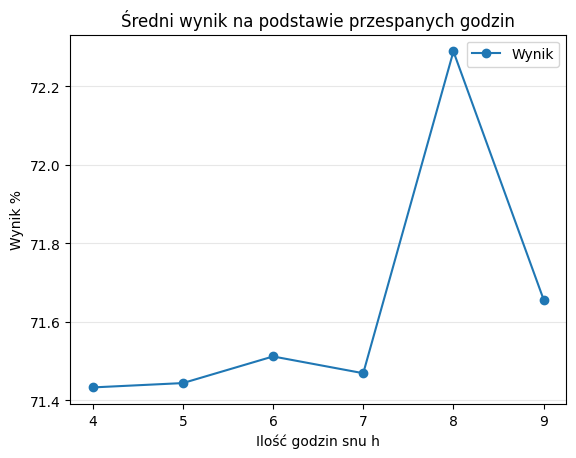

In [91]:
avarege_result_sleep = df_sleep.groupby('Sleep_Hours_per_Night')['Total_Score'].mean()

plt.plot(
    avarege_result_sleep.index,
    avarege_result_sleep.values,
    label="Wynik",
    marker="o",
)
plt.legend(loc="best")

plt.xlabel("Ilość godzin snu h")
plt.ylabel("Wynik %")
plt.grid(axis='y', alpha=0.3)
plt.title("Średni wynik na podstawie przespanych godzin")
plt.show()

Jak widać, najlepszy wynik mają osoby, które śpią 8 godzin dziennie, tyle ile jest zalecane
Najgorzej wypadają osoby, które śpią po 4 godziny.
Dłuższe spanie wcale nie polepsza wyników

# Wykres średniego wyniku na podstawie aktywności na zajęciach

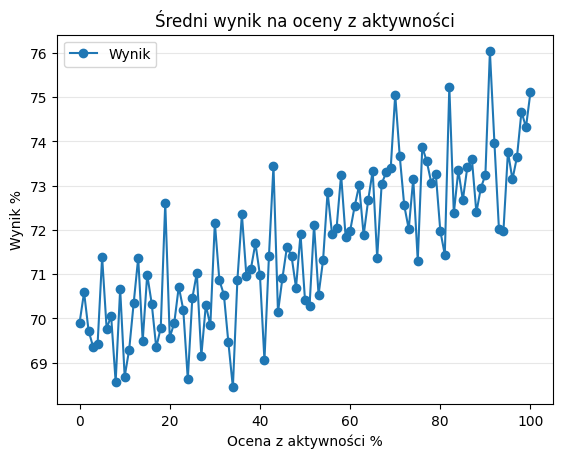

In [94]:
df_attendance = df.copy()
df_attendance['Participation_Score'] = df_attendance['Participation_Score'].round()
avarage_result_participation = df_attendance.groupby('Participation_Score')['Total_Score'].mean()

plt.plot(
    avarage_result_participation.index,
    avarage_result_participation.values,
    label="Wynik",
    marker="o",
)
plt.legend(loc="best")

plt.xlabel("Ocena z aktywności %")
plt.ylabel("Wynik %")
plt.grid(axis='y', alpha=0.3)
plt.title("Średni wynik na oceny z aktywności")
plt.show()

Wykres nie jest reguralny. Rośnie i maleje, lecz można zauważyć, iż im większa ocena z aktywności tym lepsza finalna ocena
Jakby dokonać by regresji liniowej, to współczynnik a >0, co świadczy o trendzie wzrostowym

# Wykres finalnej ocena na podstawie przepracowanych godzin

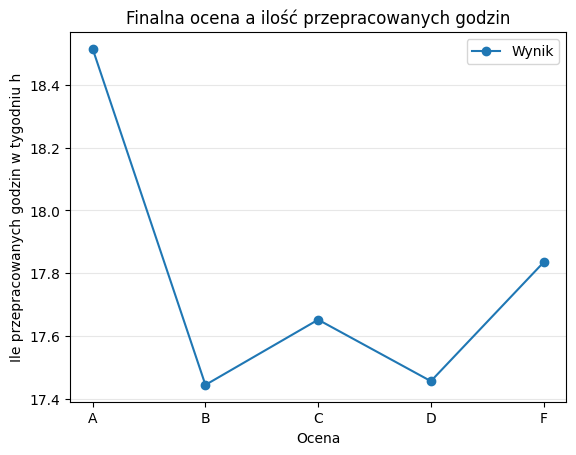

In [98]:
avarage_mark_by_work = df.groupby('Grade')['Study_Hours_per_Week'].mean()

plt.plot(
    avarage_mark_by_work.index,
    avarage_mark_by_work.values,
    label="Wynik",
    marker="o",
)
plt.legend(loc="best")

plt.xlabel("Ocena")
plt.ylabel("Ile przepracowanych godzin w tygodniu h")
plt.grid(axis='y', alpha=0.3)
plt.title("Finalna ocena a ilość przepracowanych godzin")
plt.show()

Jak widać im osoby z najwyższą oceną pracowały najwięcej.
Co ciekawe osoby, z najgorszą oceną(F) były drugie w kolejności względem ilości przepracowanych godzin.
Oznaczać to może tylko dwie kwestie - albo osoby z najgorszą oceną kłamały, albo poświeciły dużo czasu na nauczenie się czegoś czego nie potrafią i się nie nauczyły.
Co najmniej czasu na naukę poświęciły osoby z oceną B.

# Wyniki względem wydziału

In [99]:
df['Department'].unique()

array(['Mathematics', 'Business', 'Engineering', 'CS'], dtype=object)

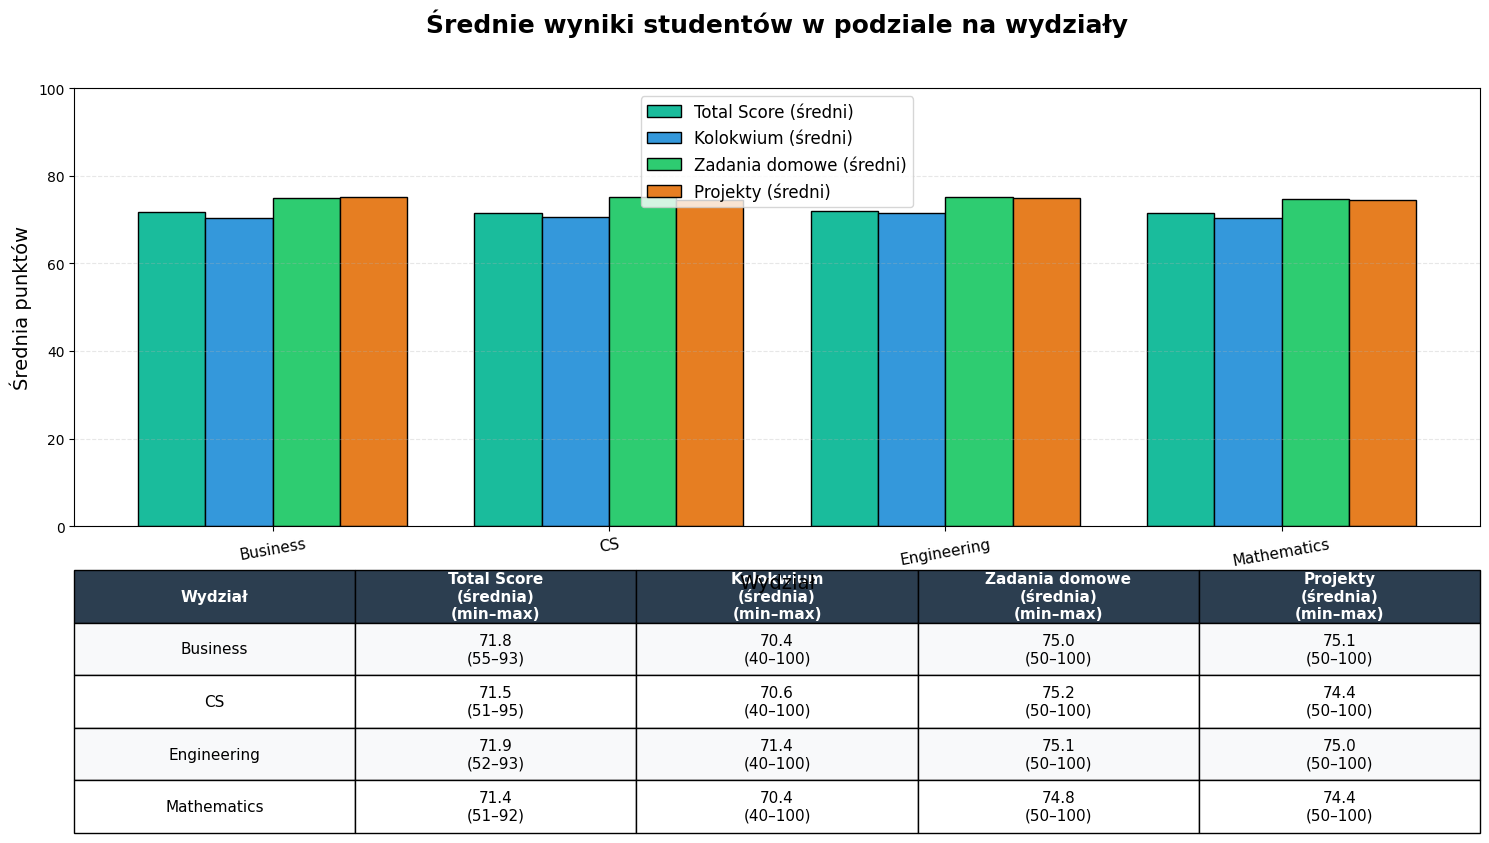

In [114]:
srednie = df.groupby('Department')[['Total_Score', 'Midterm_Score','Assignments_Avg', 'Projects_Score']].mean().round(1)
stats = df.groupby('Department')[['Total_Score', 'Midterm_Score', 'Assignments_Avg', 'Projects_Score']].agg(['min', 'max'])
srednie = srednie.sort_index()

plt.figure(figsize=(15, 9))
x = np.arange(len(srednie))
width = 0.2
#width = 0.3

plt.bar(
    x - 1.5 * width, 
    srednie['Total_Score'], 
    width, 
    label='Total Score (średni)', 
    color='#1abc9c', 
    edgecolor='black'
)
plt.bar(
    x - 0.5 * width, 
    srednie['Midterm_Score'], 
    width, 
    label='Kolokwium (średni)', 
    color='#3498db', 
    edgecolor='black'
)
plt.bar(
    x + 0.5 * width, 
    srednie['Assignments_Avg'], 
    width, 
    label='Zadania domowe (średni)', 
    color='#2ecc71', 
    edgecolor='black'
)
plt.bar(
    x + 1.5 * width, 
    srednie['Projects_Score'], 
    width, 
    label='Projekty (średni)', 
    color='#e67e22', 
    edgecolor='black'
)

plt.title('Średnie wyniki studentów w podziale na wydziały', fontsize=18, fontweight='bold', pad=40)
plt.xlabel('Wydział', fontsize=14)
plt.ylabel('Średnia punktów', fontsize=14)
plt.xticks(x, srednie.index, rotation=10, fontsize=11)
plt.ylim(0, 100)
plt.legend(fontsize=12, loc='upper center')
plt.grid(axis='y', alpha=0.3, linestyle='--')


table_data = []
for dept in srednie.index:
    row = [
        dept,
        f"{srednie.loc[dept, 'Total_Score']}\n({stats.loc[dept, ('Total_Score','min')]:.0f}–{stats.loc[dept, ('Total_Score','max')]:.0f})",
        f"{srednie.loc[dept, 'Midterm_Score']}\n({stats.loc[dept, ('Midterm_Score','min')]:.0f}–{stats.loc[dept, ('Midterm_Score','max')]:.0f})",
        f"{srednie.loc[dept, 'Assignments_Avg']}\n({stats.loc[dept, ('Assignments_Avg','min')]:.0f}–{stats.loc[dept, ('Assignments_Avg','max')]:.0f})",
        f"{srednie.loc[dept, 'Projects_Score']}\n({stats.loc[dept, ('Projects_Score','min')]:.0f}–{stats.loc[dept, ('Projects_Score','max')]:.0f})"
    ]
    table_data.append(row)


etykiety_kolumn = [
    'Wydział', 
    'Total Score\n(średnia)\n(min–max)',
    'Kolokwium\n(średnia)\n(min–max)',
    'Zadania domowe\n(średnia)\n(min–max)',
    'Projekty\n(średnia)\n(min–max)'
]

table = plt.table(
    cellText=table_data,
    colLabels=etykiety_kolumn,
    cellLoc='center',
    loc='bottom',
    bbox=[0, -0.7, 1, 0.6],
    #bbox=[0, -1.1, 1, 0.8],
    colWidths=[0.2, 0.2, 0.2, 0.2, 0.2]
)

table.auto_set_font_size(False)
table.set_fontsize(11)
for i in range(len(table_data) + 1):
    for j in range(5):
        table[(i, j)].set_height(0.12)
        if i == 0:
            table[(i, j)].set_facecolor('#2c3e50')
            table[(i, j)].set_text_props(weight='bold', color='white')
        else:
            table[(i, j)].set_facecolor('#f8f9fa' if i % 2 == 1 else 'white')

plt.subplots_adjust(left=0.1, bottom=0.32, top=0.88)
plt.tight_layout()
plt.show()

Jak widać, niezależnie od wydziału schemat jest taki sam:
Najlepiej wychodzą zadzania i projekt. Najgorzej kolokwium, odrobinę lepiej suma puntków co może świadczyć o mobilizacji na czas finalnego egzaminu.
W tabeli nie widać większego odstawania od wartości względem wydziałów, różnice to wartość jednego p.p.
W tabeli widać, też że najlepiej wypadają osoby na Inżynierii - wygrywają w 3 z 4 kategorii.

# Analiza stresu

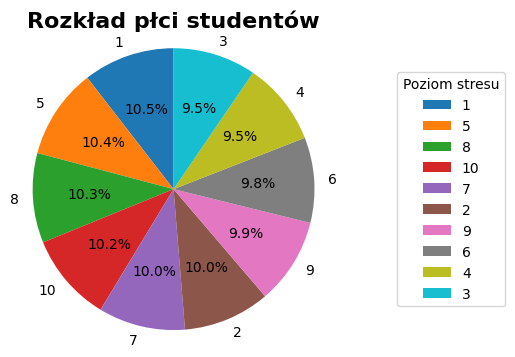

In [120]:
import matplotlib.pyplot as plt

stress_count = df['Stress_Level (1-10)'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(stress_count, 
        labels=stress_count.index,
        autopct='%1.1f%%',
        startangle=90,
)

plt.title('Rozkład płci studentów', fontsize=16, fontweight='bold')
plt.legend(title="Poziom stresu", loc="center left", bbox_to_anchor=(1.2, 0.5))
plt.axis('equal')
plt.show()

Każdy poziom stresu jest rónomiernie przeswiaowy i wynosi około 10% dla każdej kategorii - brak większych odstępstw

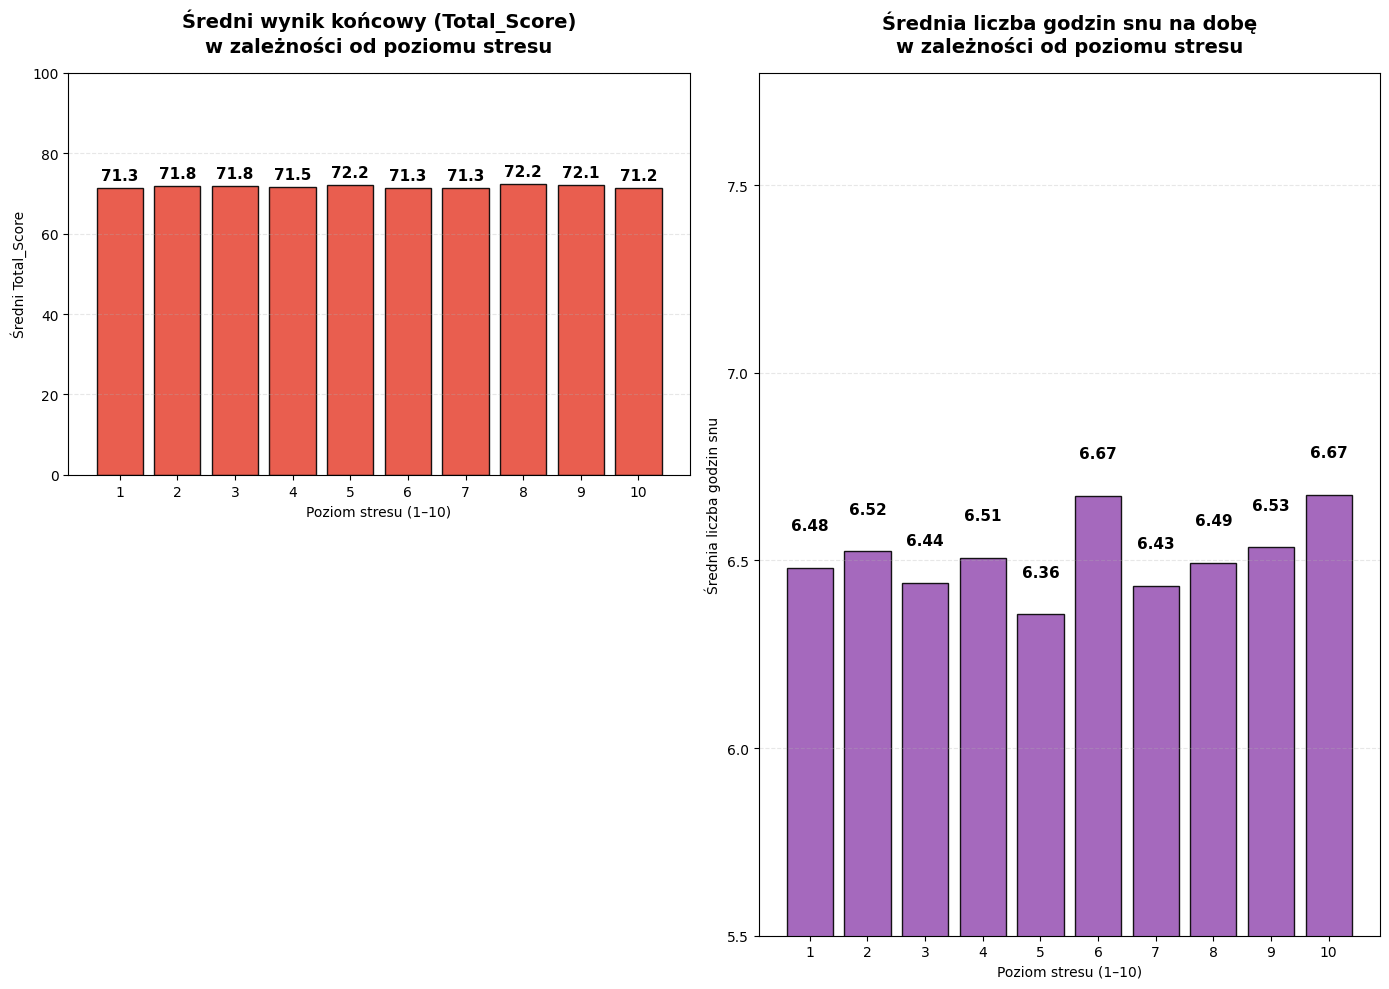

In [135]:
stress_score = df.groupby('Stress_Level (1-10)')['Total_Score'].mean()
stress_sleep = df.groupby('Stress_Level (1-10)')['Sleep_Hours_per_Night'].mean()

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.bar(
    stress_avg.index, 
    stress_avg.values, 
    color='#e74c3c', 
    edgecolor='black', 
    alpha=0.9
)
plt.title(
    'Średni wynik końcowy (Total_Score)\nw zależności od poziomu stresu', 
    fontsize=14, 
    fontweight='bold', 
    pad=15
)
plt.xlabel('Poziom stresu (1–10)')
plt.ylabel('Średni Total_Score')
plt.xticks(range(1, 11))
plt.ylim(0, 100)

plt.grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(stress_avg.values):
    plt.text(i+1, v + 2, f"{v:.1f}", ha='center', fontweight='bold', fontsize=11)


plt.subplot(1,2,2)
bars = plt.bar(
    stress_sleep.index,
    stress_sleep.values,
    color='#9b59b6',
    edgecolor='black',
    alpha=0.9
)
plt.title(
    'Średnia liczba godzin snu na dobę\nw zależności od poziomu stresu',
    fontsize=14, 
    fontweight='bold', 
    pad=15
)

plt.xlabel('Poziom stresu (1–10)')
plt.ylabel('Średnia liczba godzin snu')
plt.xticks(range(1, 11))
plt.ylim(5.5, 7.8)
plt.grid(axis='y',alpha=0.3, linestyle='--')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0, 
        height + 0.1, 
        f"{height:.2f}",
        ha='center', 
        fontweight='bold', 
        fontsize=11
    )

plt.tight_layout()
plt.show()

Jak widzimy, stress, nie zawsze wpływa dobrze na wyniki. Osoby najbardziej zestresowane otrzymują najgorsze wyniki, tylko odrobinę gorzej niż osoby wogóle niezestresowane.
Co ciekawe najlepsze wyniki otrzymują osoby w stresie w przedziale (8-9), który przekracza 72%.

Widać też, że osoby najbardziej zestresowane śpią nawięcej 6.67 godzin. Tyle samo śpią osoby średnio zestresowane(6). Po przekroczeniu progru stressu równego 6, widać, że ilość godzin snu zaczyna rosnąc

# Wykres wyniku całkowitego w zależności od wykształcenia rodziców

C:\Users\mz10m\AppData\Local\Temp\ipykernel_6988\920212167.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


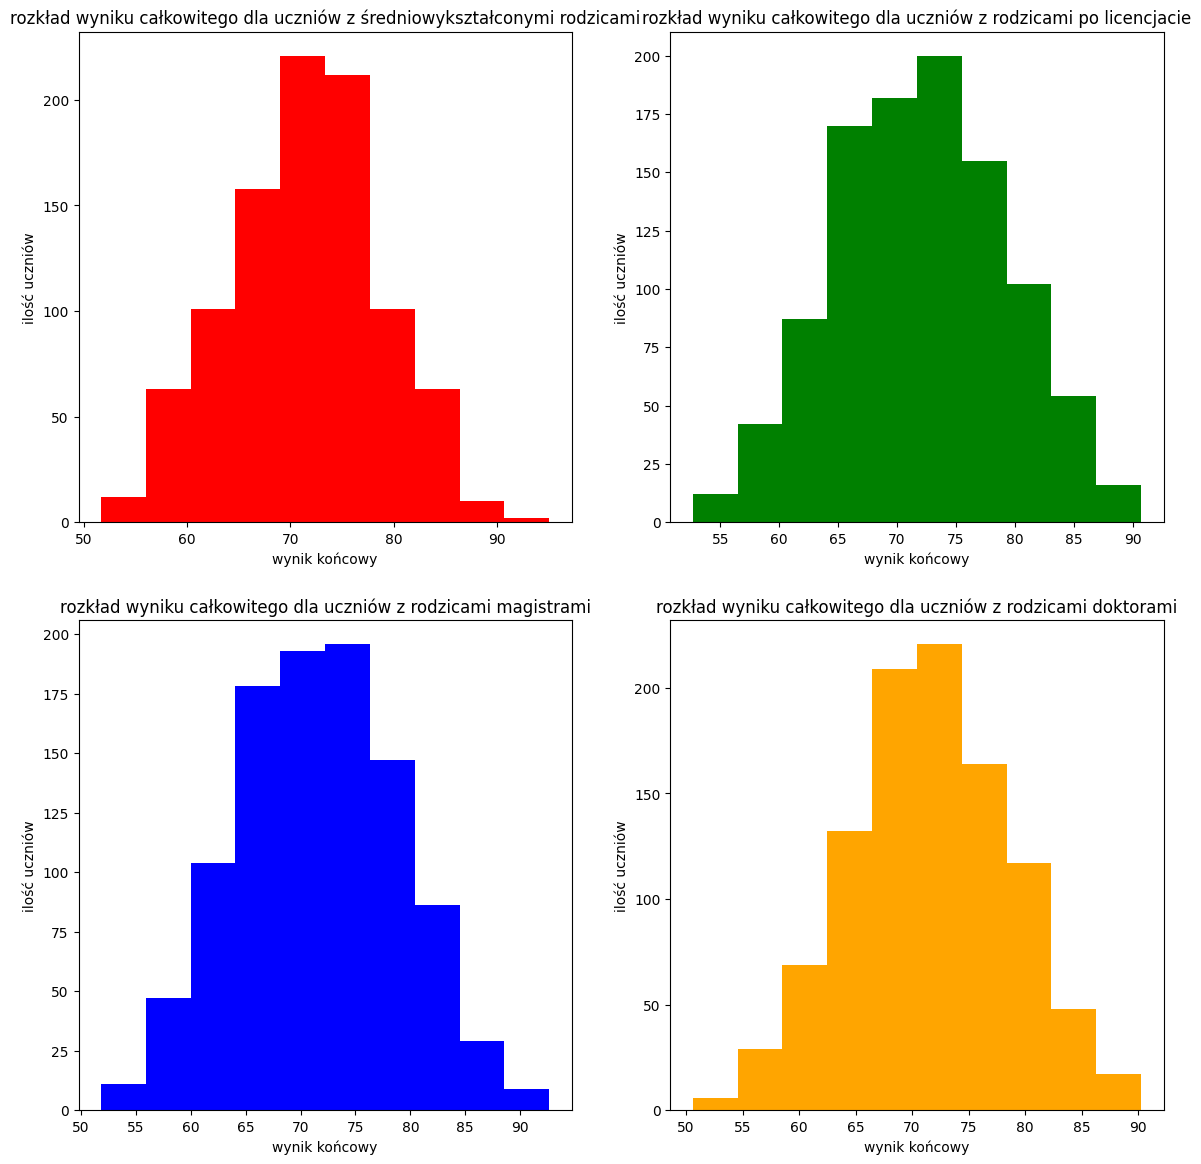

In [30]:
fig, ((sr, mg), (doc, prof)) = plt.subplots(nrows=2, ncols=2, figsize=(14,14)) 
srednie = df.where(df["Parent_Education_Level"]==1)
srednie=srednie.dropna()
srednie=srednie.reset_index()
sr.hist(srednie["Total_Score"], color="red")
sr.set_title("rozkład wyniku całkowitego dla uczniów z średniowykształconymi rodzicami")
sr.set_ylabel("ilość uczniów")
sr.set_xlabel("wynik końcowy")
doktor = df.where(df["Parent_Education_Level"]==0)
doktor=doktor.dropna()
doktor=doktor.reset_index()
doc.hist(doktor["Total_Score"], color="blue")
doc.set_title("rozkład wyniku całkowitego dla uczniów z rodzicami magistrami")
doc.set_ylabel("ilość uczniów")
doc.set_xlabel("wynik końcowy")
mag = df.where(df["Parent_Education_Level"]==2)
mag=mag.dropna()
mag=mag.reset_index()
mg.hist(mag["Total_Score"], color="green")
mg.set_title("rozkład wyniku całkowitego dla uczniów z rodzicami po licencjacie")
mg.set_ylabel("ilość uczniów")
mg.set_xlabel("wynik końcowy")
profesor = df.where(df["Parent_Education_Level"]==3)
profesor=profesor.dropna()
profesor=profesor.reset_index()
prof.hist(profesor["Total_Score"], color="orange")
prof.set_title("rozkład wyniku całkowitego dla uczniów z rodzicami doktorami")
prof.set_ylabel("ilość uczniów")
prof.set_xlabel("wynik końcowy")
fig.show()

Jak można zauważyć z wykresów w przypadku rodziców z licencjatem oraz magistrów wyniki są bardzo podobne do siebie z lekką przewagą rodziców magistrów. W przypadku uczniów z rodzicami posiadającymi wykształcenie średnie można zauważyć dużą przepaść między wynikiem 75 a wyższymi. W przypadku uczniów z rodzicami doktorami widać ogólnie wyższe wyniki względem reszty.

# Wykres wyniku całkowitego w zależności od dostępu do internetu

C:\Users\mz10m\AppData\Local\Temp\ipykernel_6988\170228170.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


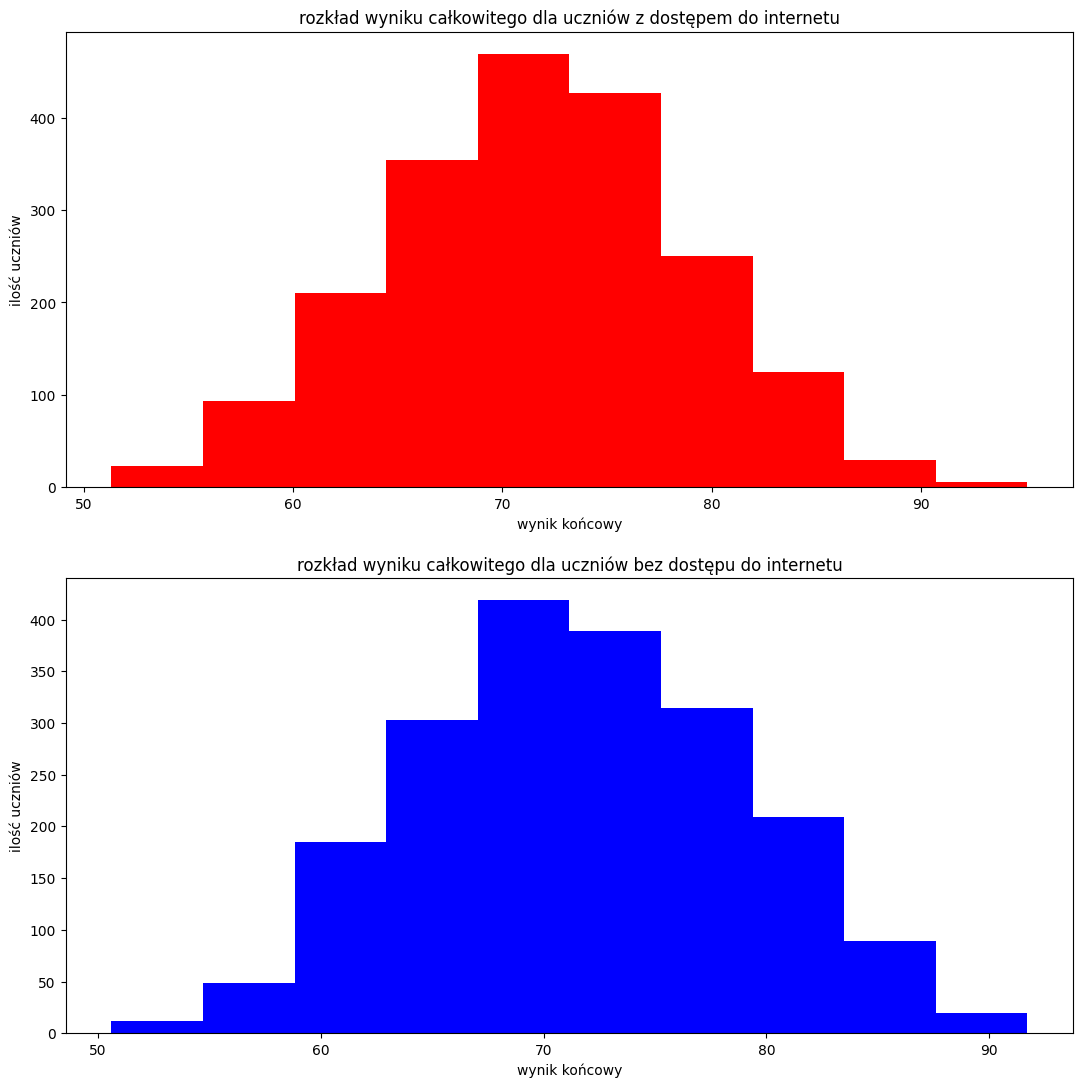

In [29]:
fig, (madostep,niemadostep) = plt.subplots(nrows=2, figsize=(13,13)) 
mados = df.where(df["Internet_Access_at_Home"]==1)
mados=mados.dropna()
mados=mados.reset_index()
madostep.hist(mados["Total_Score"], color="red")
madostep.set_title("rozkład wyniku całkowitego dla uczniów z dostępem do internetu")
madostep.set_ylabel("ilość uczniów")
madostep.set_xlabel("wynik końcowy")
niedos = df.where(df["Internet_Access_at_Home"]==0)
niedos=niedos.dropna()
niedos=niedos.reset_index()
niemadostep.hist(niedos["Total_Score"], color="blue")
niemadostep.set_title("rozkład wyniku całkowitego dla uczniów bez dostępu do internetu")
niemadostep.set_ylabel("ilość uczniów")
niemadostep.set_xlabel("wynik końcowy")
fig.show()

In [ ]:
Z wykresów wynika że studenci bez dostępu do internetu osiągneli wyższe wyniki niż studenci z dostępem

# Wykres wyniku całkowitego w zależności od wykonywanych dodatkowych aktywności

C:\Users\mz10m\AppData\Local\Temp\ipykernel_6988\195302151.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


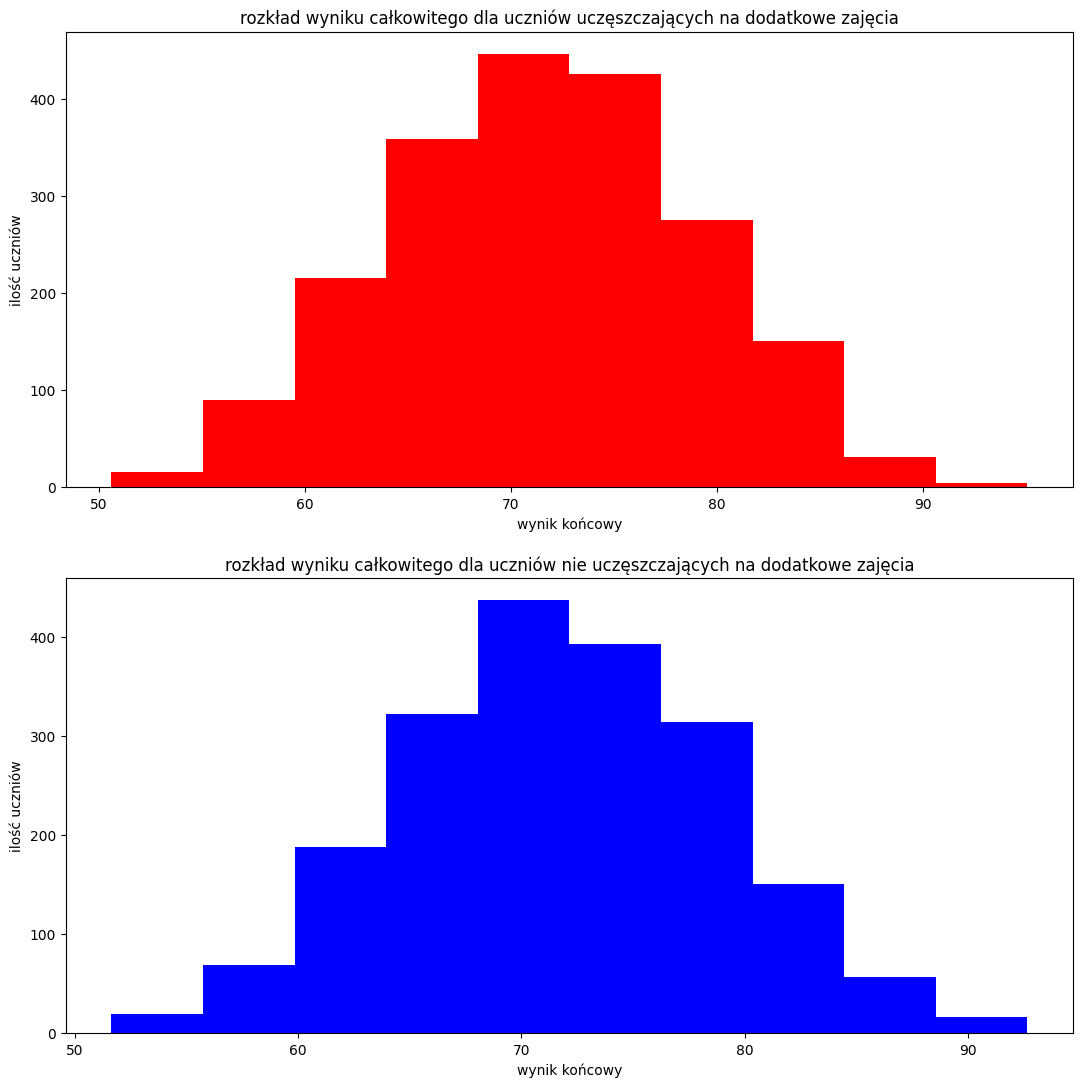

In [28]:
fig, (robildod,nierobildod) = plt.subplots(nrows=2, figsize=(13,13)) 
robil= df.where(df["Extracurricular_Activities"]==1)
robil=robil.dropna()
robil=robil.reset_index()
robildod.hist(robil["Total_Score"], color="red")
robildod.set_title("rozkład wyniku całkowitego dla uczniów uczęszczających na dodatkowe zajęcia")
robildod.set_ylabel("ilość uczniów")
robildod.set_xlabel("wynik końcowy")
nierobil = df.where(df["Extracurricular_Activities"]==0)
nierobil=nierobil.dropna()
nierobil=nierobil.reset_index()
nierobildod.hist(nierobil["Total_Score"], color="blue")
nierobildod.set_title("rozkład wyniku całkowitego dla uczniów nie uczęszczających na dodatkowe zajęcia")
nierobildod.set_ylabel("ilość uczniów")
nierobildod.set_xlabel("wynik końcowy")
fig.show()

W przypadku wpływu dodatkowych aktywności na wyniki końcowe mamy niewielką przewagę na korzyść uczniów uczęszczających na dodatkowe zajęcia

# Wykres wyniku całkowitego w zależności od zarobków rodziców

C:\Users\mz10m\AppData\Local\Temp\ipykernel_6988\3621902852.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


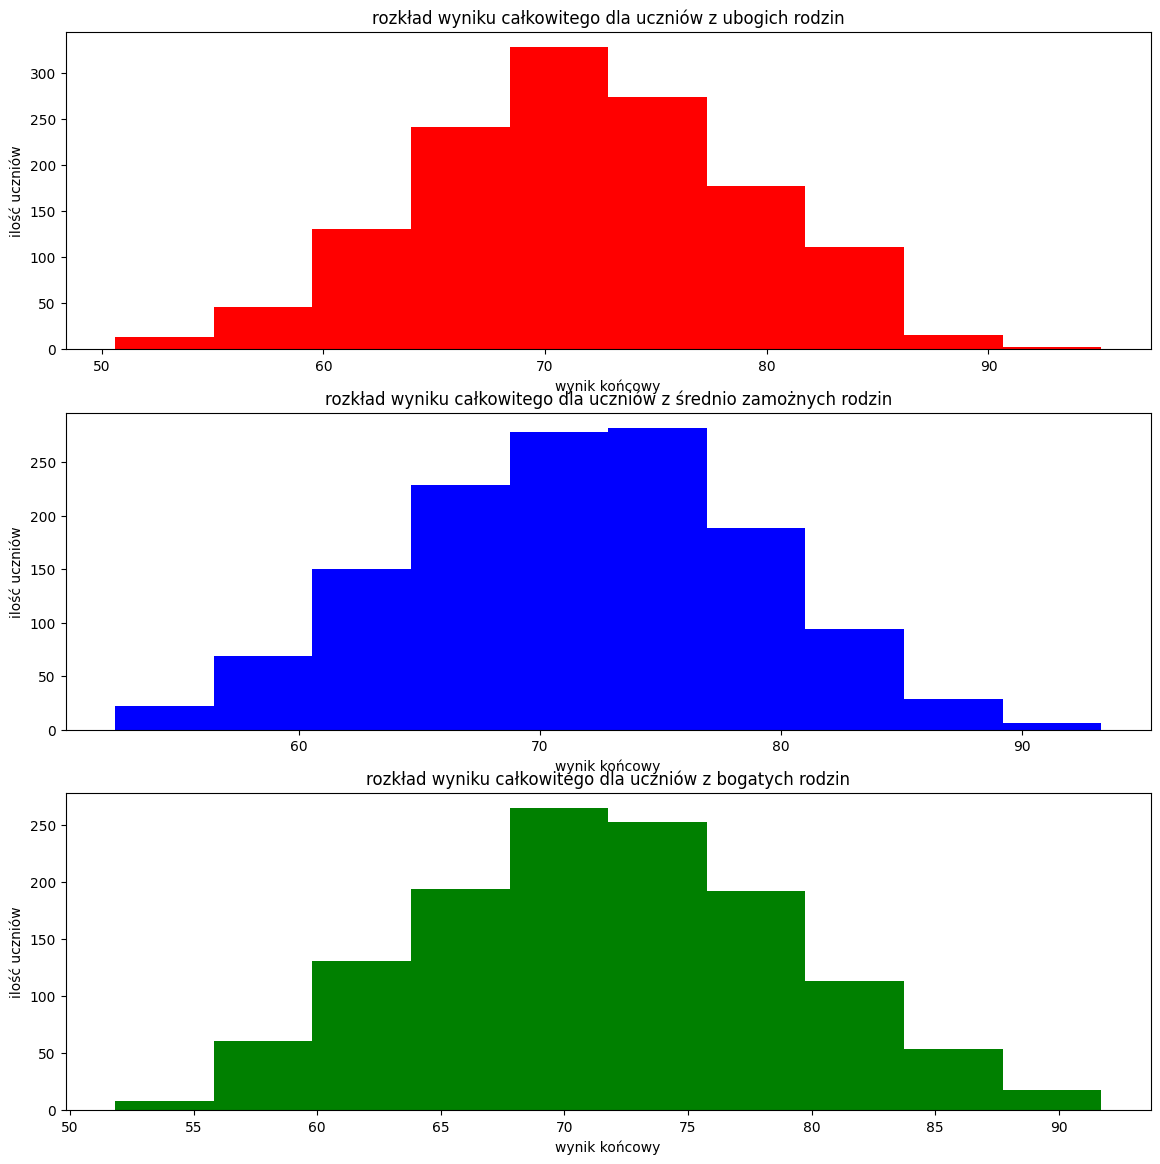

In [27]:
fig, (malozar,sredniozar, duzozar) = plt.subplots(nrows=3, figsize=(14,14)) 
malyzarob= df.where(df["Family_Income_Level"]==0)
malyzarob=malyzarob.dropna()
malyzarob=malyzarob.reset_index()
malozar.hist(malyzarob["Total_Score"], color="red")
malozar.set_title("rozkład wyniku całkowitego dla uczniów z ubogich rodzin")
malozar.set_ylabel("ilość uczniów")
malozar.set_xlabel("wynik końcowy")
sredniozarob = df.where(df["Family_Income_Level"]==1)
sredniozarob=sredniozarob.dropna()
sredniozarob=sredniozarob.reset_index()
sredniozar.hist(sredniozarob["Total_Score"], color="blue")
sredniozar.set_title("rozkład wyniku całkowitego dla uczniów z średnio zamożnych rodzin")
sredniozar.set_ylabel("ilość uczniów")
sredniozar.set_xlabel("wynik końcowy")
duzozarob = df.where(df["Family_Income_Level"]==2)
duzozarob=duzozarob.dropna()
duzozarob=duzozarob.reset_index()
duzozar.hist(duzozarob["Total_Score"], color="green")
duzozar.set_title("rozkład wyniku całkowitego dla uczniów z bogatych rodzin")
duzozar.set_ylabel("ilość uczniów")
duzozar.set_xlabel("wynik końcowy")
fig.show()

Wykresy pokazują że w przypadku uczniów z średnio zamożnych oraz bogatych rodziców zbyt dużej różnicy nie ma to jednak w przypadku rodzin ubogich to widać wyraźny spadek w wyższych wynikach